In [16]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import ZGate
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-18 01:56:23,956: Credentials are already in use. The existing account in the session will be replaced.


In [224]:
# Correct Answer
omega = '011'

In [225]:
number_of_qubits = 4
number_of_clbits = 4

qreg = QuantumRegister(number_of_qubits)
creg = ClassicalRegister(number_of_clbits)

qc = QuantumCircuit(qreg, creg)

In [226]:
def walsh_hadamard_transform(qc: QuantumCircuit, num_of_qubits: int):
    for qubit_index in range(num_of_qubits):
        qc.h(qubit_index)
    qc.barrier()
        
def oracle(qc: QuantumCircuit, qreg: QuantumRegister, num_of_qubits: int, omega: str):
    for bit_idx in range(len(omega)): 
        if omega[bit_idx] == '0':
            qc.x(bit_idx)
            
    oracle_subcircuit = ZGate().control(num_of_qubits)
    qc.append(oracle_subcircuit, qreg)
    
    for bit_idx in range(len(omega)): 
        if omega[bit_idx] == '0':
            qc.x(bit_idx)
            
    qc.barrier()
            
def check_if_input_is_all_zeros(qc: QuantumCircuit, num_of_qubits: int):
    for qubit_index in range(num_of_qubits):
        qc.x(qubit_index)
        
    oracle_subcircuit = ZGate().control(num_of_qubits)
    qc.append(oracle_subcircuit, qreg)
    
    for qubit_index in range(num_of_qubits):
        qc.x(qubit_index)
        
    qc.barrier()

def grover_iteration(qc):
    oracle(qc, qreg, num_of_qubits-1, omega)
    walsh_hadamard_transform(qc, num_of_qubits-1)
    check_if_input_is_all_zeros(qc, num_of_qubits-1)
    walsh_hadamard_transform(qc, num_of_qubits-1)
    
def take_measurement(grover_circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
    qobj = assemble(transpiled_grover_circuit)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    plot_histogram(counts)

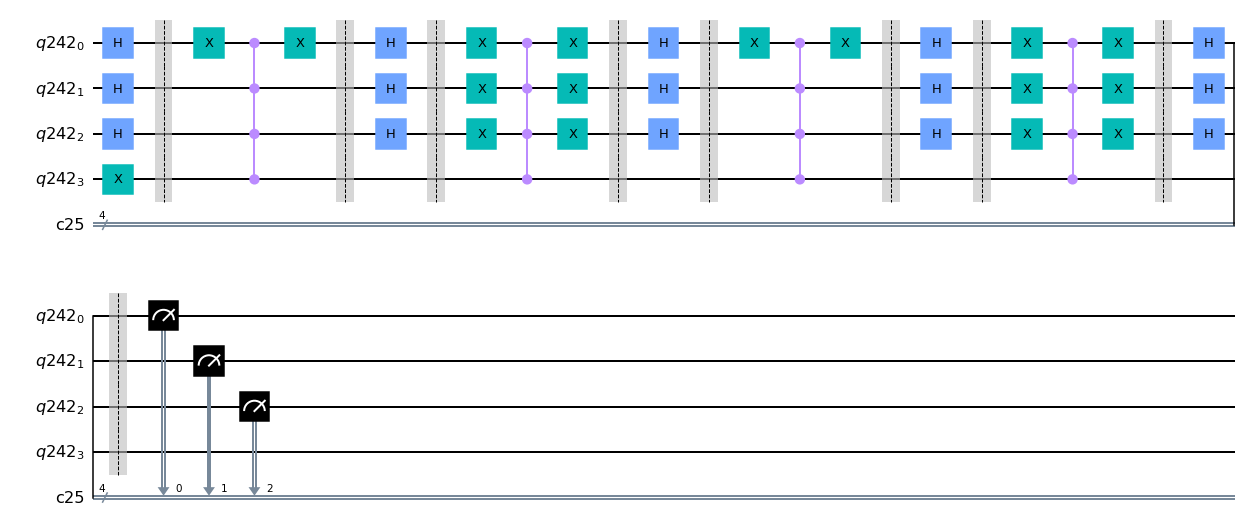

In [227]:
qc.x(num_of_qubits-1)
walsh_hadamard_transform(qc, num_of_qubits-1)
for _ in range(2):
    grover_iteration(qc)
qc.measure([0,1,2], [0,1,2])

qc.draw()

In [228]:
def sv_simulate_circuit(qc):            
    backend = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use 
    job = execute(qc,backend) # Put in the name of your quantum circuit where it says qc
    result = job.result() 

    state = np.asarray(result.get_statevector())
    
    amplitude_list = []
    for amplitude in state:
        amplitude_list.append(np.round(amplitude,3))
        
    return amplitude_list

def aer_simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc,backend, shots = 1024)
    result = job.result()         
    return result.get_counts()

In [229]:
qc_state = simulate_circuit(qc)
array_to_latex(qc_state, "\\text{Statevector} = ")

<IPython.core.display.Latex object>

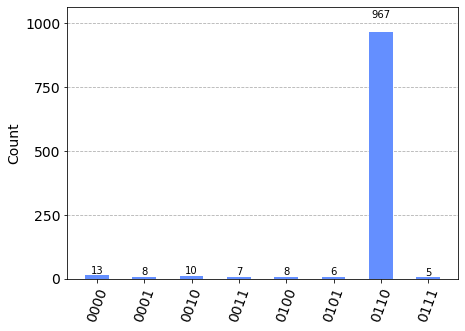

In [230]:
plot_histogram(aer_simulate_circuit(qc)) 